In [1]:
#Import necessary packages 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from datetime import date, timedelta
from sklearn.model_selection import TimeSeriesSplit
%matplotlib inline
import os

In [2]:
# Import mean_squared_error and ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [4]:
# load the dataset
df = pd.read_csv('df5.csv', index_col=0)

In [5]:
df.head()

,CLOSE,Positive,Negative,Neutral,Total,summed_vader,sentiments,headlines,stocks,date,dayOfWeek,ave_vader,daily_sentiment,compound,overall_sentiment,Pos_minus_Neg
133,20.04,52,17,96,165,13.7954,"['Positive', ' Neutral', ' Neutral', ' Positiv...","Gold Gains Traction (GLD, GDX, IAG, NEM, ABX),...","['ABX', ' ACTG', ' AEIS', ' AEO', ' AEO', ' AF...",2010-01-04,Monday,0.083608,Positive,0.9982,Positive,35
134,19.35,84,15,103,202,34.1086,"['Neutral', ' Negative', ' Neutral', ' Positiv...",Advance Auto Parts – A Turnaround Candidate (A...,"['AAP', ' ACE', ' ACN', ' ACN', ' ADBE', ' AEO...",2010-01-05,Tuesday,0.168854,Positive,0.9997,Positive,69
135,19.16,74,8,86,168,23.6630,"['Neutral', ' Neutral', ' Positive', ' Positiv...","Insurance Sector Overview - 2010 (AGII, SBX, A...","['ACE', ' AEIS', ' AGQ', ' AKS', ' ALL', ' ARE...",2010-01-06,Wednesday,0.140851,Positive,0.9993,Positive,66
136,19.06,90,29,106,225,24.1130,"['Positive', ' Negative', ' Neutral', ' Negati...","Benzinga’s Top Downgrades (WEN, CMP, ACL, PPDI...","['ABC', ' ACN', ' AEO', ' AEO', ' AER', ' AET'...",2010-01-07,Thursday,0.107169,Positive,0.9986,Positive,61
137,18.13,80,26,111,217,16.3447,"['Negative', ' Neutral', ' Positive', ' Negati...",Gold Finishes Lower After Pressure from the Do...,"['ABX', ' AEO', ' AGU', ' AGU', ' AIB', ' AKS'...",2010-01-08,Friday,0.075321,Positive,0.9984,Positive,54


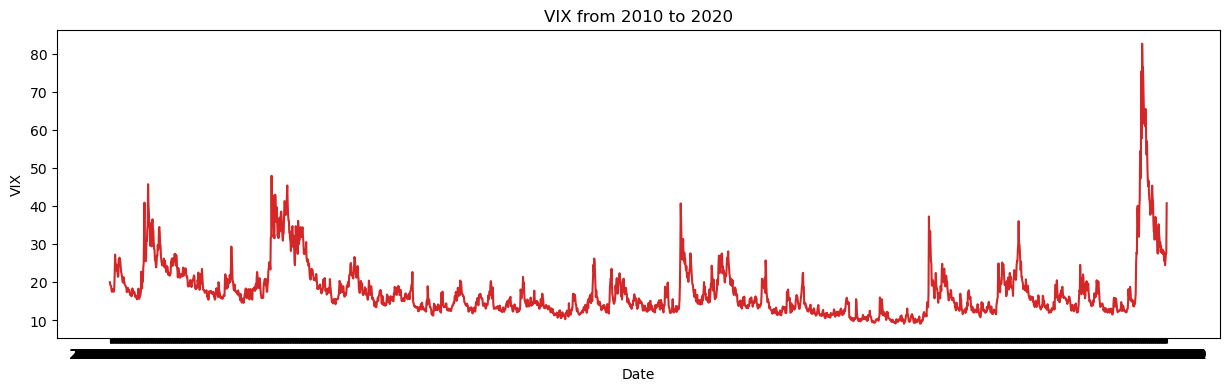

In [6]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(df, x=df['date'], y=df['CLOSE'], title='VIX from 2010 to 2020', ylabel='VIX')

## Autocorrelation

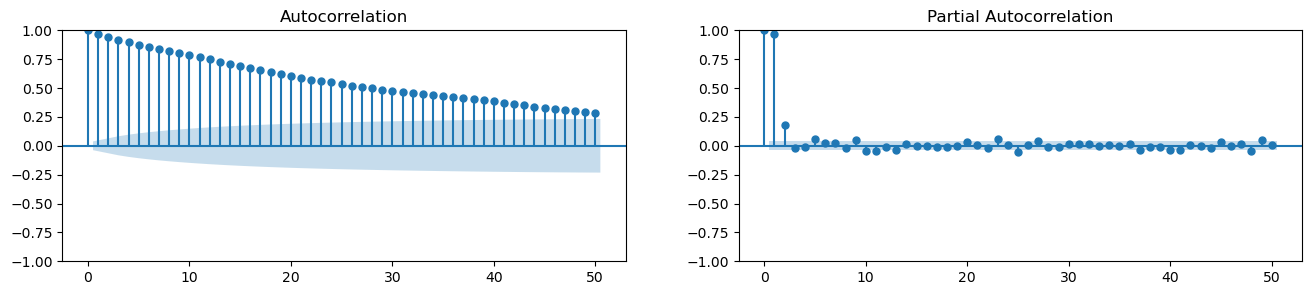

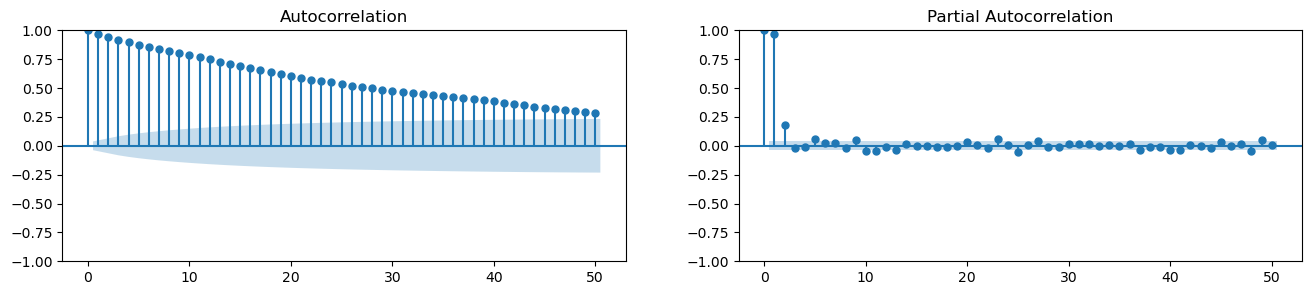

In [7]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['CLOSE'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['CLOSE'].tolist(), lags=50, ax=axes[1])

## Lag Plot

In [8]:
values = pd.DataFrame(df['CLOSE'].values)
lags = 9
columns = [values] 
for i in range(1,(lags + 1)):
    columns.append(values.shift(i)) 
dataframe = pd.concat(columns, axis=1) 
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns

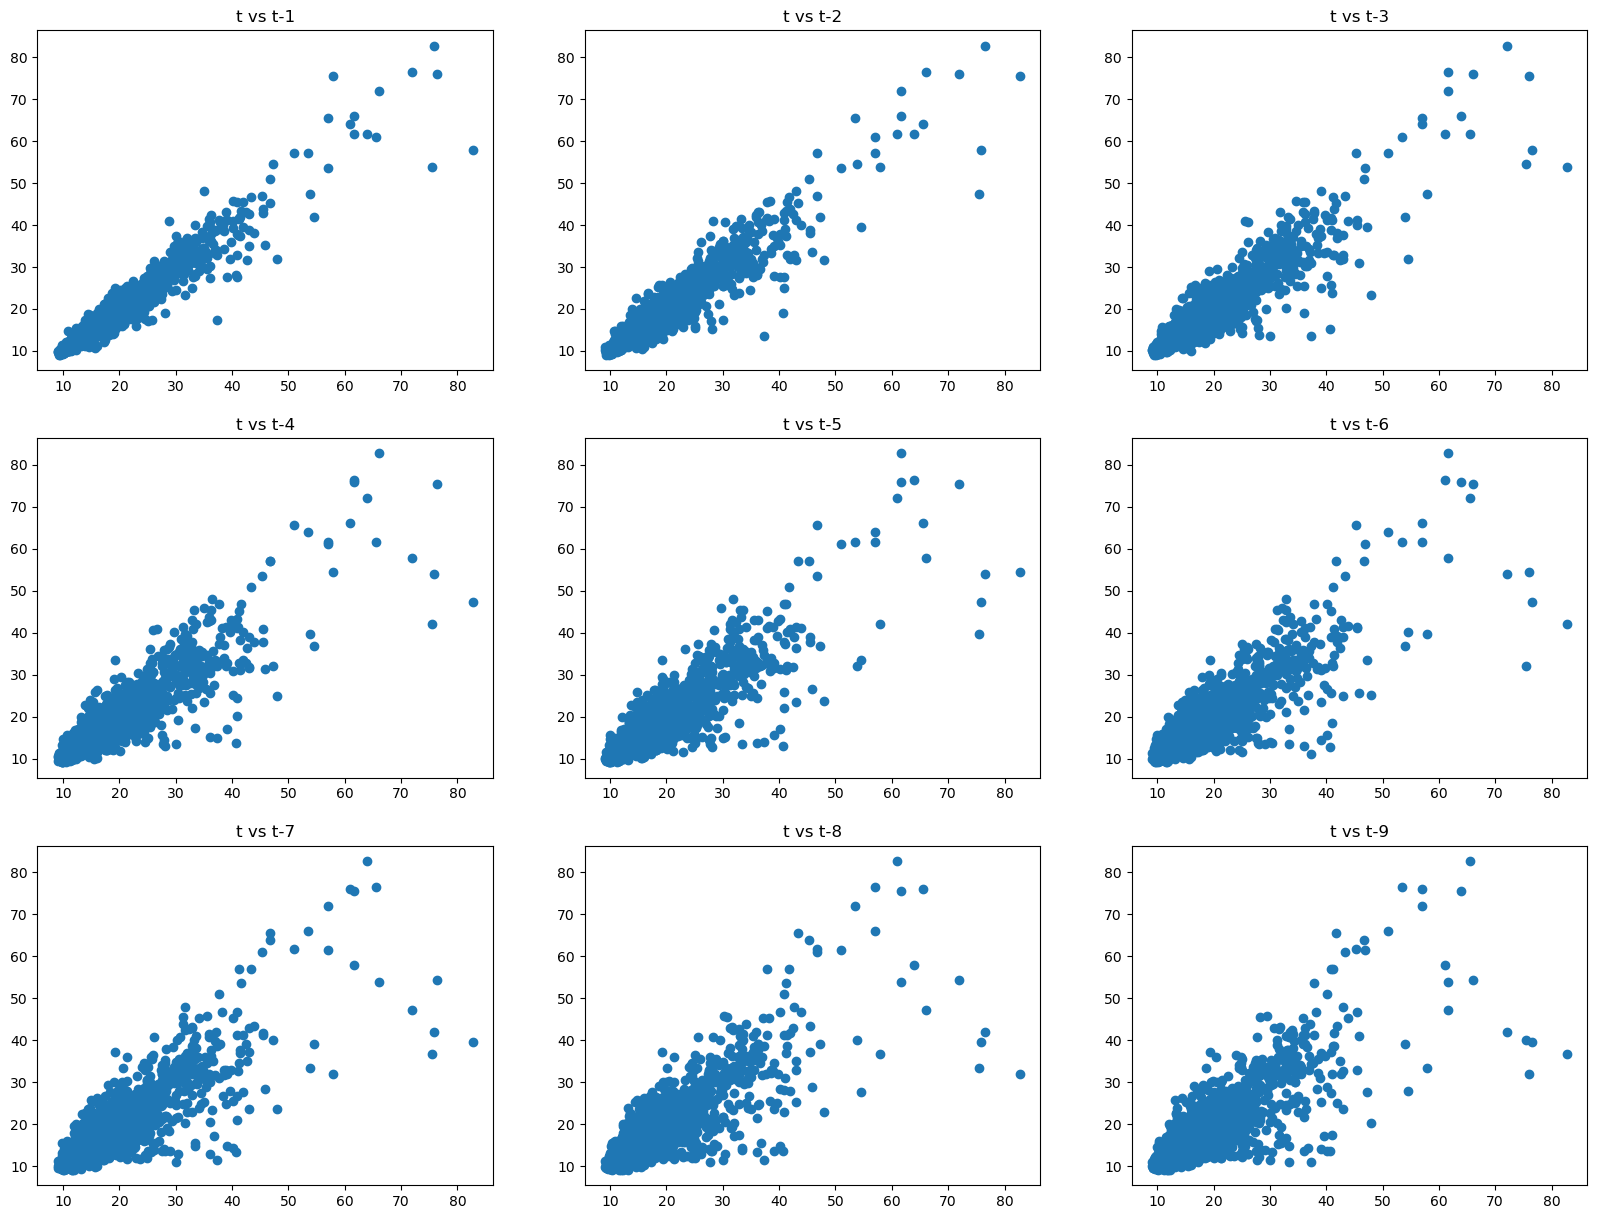

In [9]:
plt.figure(figsize = (20,15))

for i in range(1,(lags + 1)):
    ax = plt.subplot(330 + i)
    ax.set_title('t vs t-' + str(i)) 
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)

plt.show();

## Moving Averages

Text(0.5, 0, 'Date')

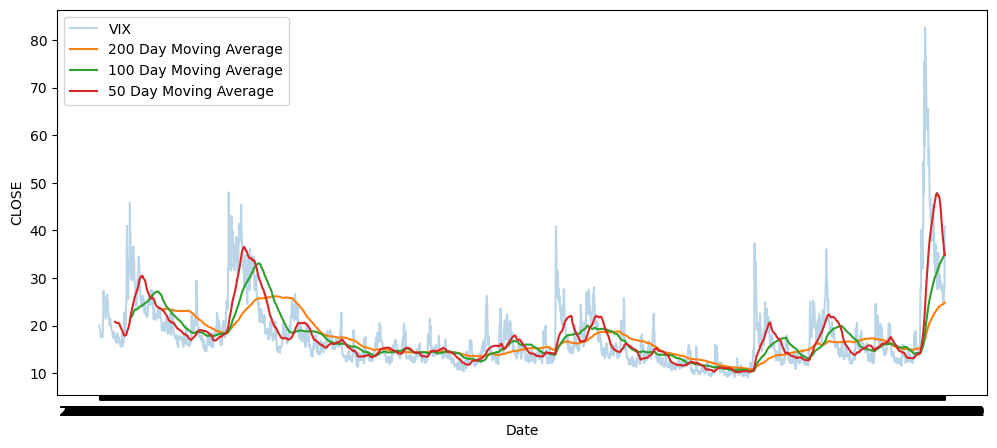

In [10]:
## Write a function to do this
# computing a 5 day rolling average 
df[ '200day_rolling_avg' ] = df.CLOSE.rolling( 200).mean()
df[ '100day_rolling_avg' ] = df.CLOSE.rolling( 100).mean() 
df[ '50day_rolling_avg' ] = df.CLOSE.rolling( 50).mean()  
# viewing the dataset 
# df.head(10) 
# set figure size 
plt.figure( figsize = ( 12, 5)) 
  
# plot a simple time series plot 
# using seaborn.lineplot() 
sns.lineplot( x = 'date', 
             y = 'CLOSE', 
             data = df, 
             label = 'VIX',
             alpha=.3) 
sns.lineplot( x = 'date', 
             y = '200day_rolling_avg', 
             data = df, 
             label = '200 Day Moving Average') 
sns.lineplot( x = 'date', 
             y = '100day_rolling_avg', 
             data = df, 
             label = '100 Day Moving Average') 
sns.lineplot( x = 'date', 
             y = '50day_rolling_avg', 
             data = df, 
             label = '50 Day Moving Average')
plt.xlabel( 'Date') 

Text(0.5, 0, 'Date')

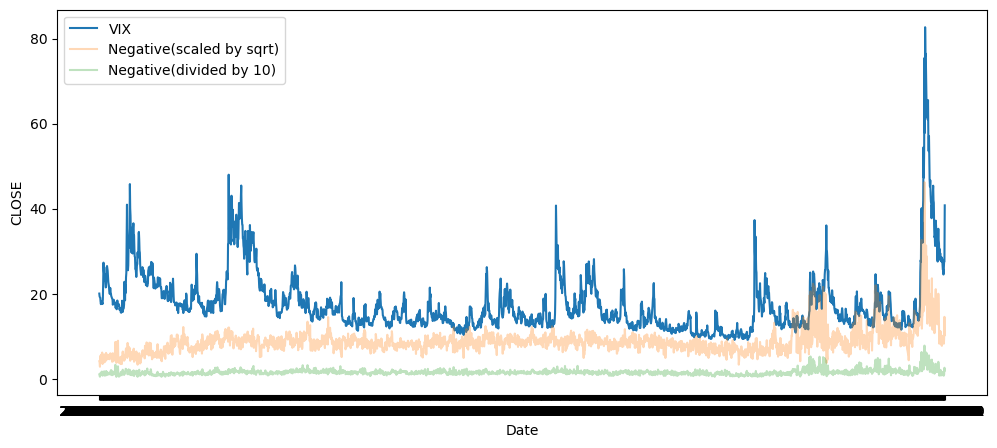

In [11]:
## Write a function to do this
# computing a 5 day rolling average 
# df[ '200day_rolling_avg' ] = df.Negative.rolling( 200).mean()
# df[ '100day_rolling_avg' ] = df.Negative.rolling( 100).mean() 
# df[ '50day_rolling_avg' ] = df.Negative.rolling( 50).mean()  
# viewing the dataset 
# df.head(10) 
# set figure size 
df['scaled_sqrt'] = np.sqrt(df['Negative'])
df['scaled_div10'] = 10 * df['Negative']/df['Total']
plt.figure( figsize = ( 12, 5)) 
  
# plot a simple time series plot 
# using seaborn.lineplot() 
sns.lineplot( x = 'date', 
             y = 'CLOSE', 
             data = df, 
             label = 'VIX') 
sns.lineplot( x = 'date', 
             y = 'scaled_sqrt', 
             data = df, 
             label = 'Negative(scaled by sqrt)',
             alpha=.3) 
sns.lineplot( x = 'date', 
             y = 'scaled_div10', 
             data = df, 
             label = 'Negative(divided by 10)',
             alpha=.3) 
# sns.lineplot( x = 'date', 
#              y = '50day_rolling_avg', 
#              data = df, 
#              label = '50 Day Moving Average')
plt.xlabel( 'Date') 

Test RMSE: 2.554


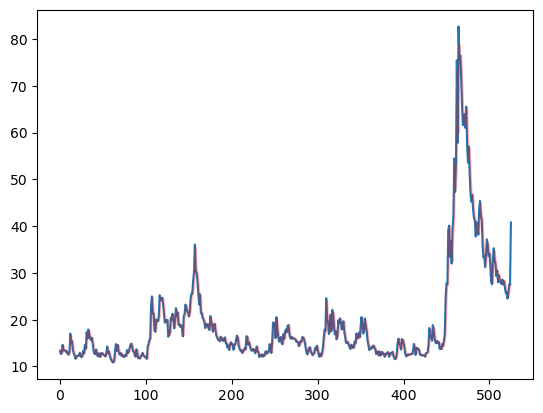

CPU times: total: 2min 10s
Wall time: 49.1 s


In [12]:
%%time
# split into train and test sets
X = df.CLOSE.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red', alpha=.3)
plt.show()

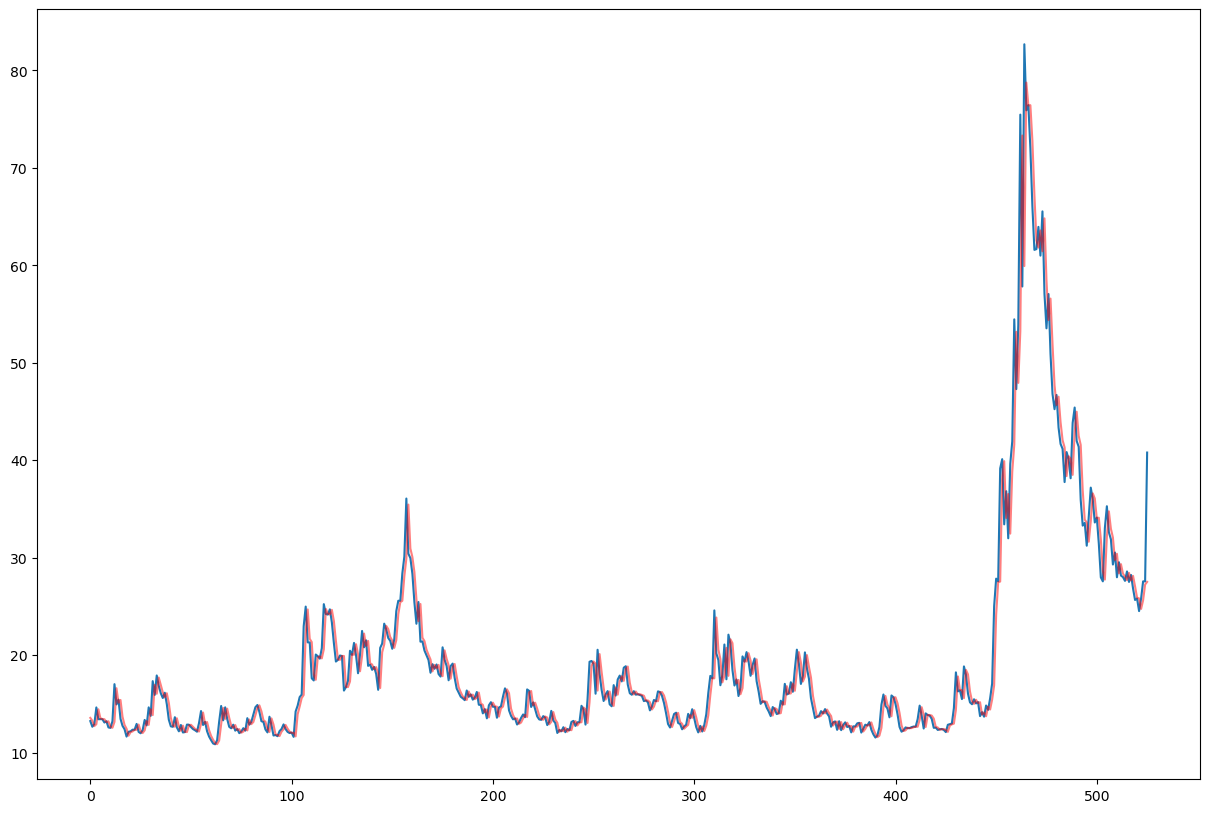

In [13]:
plt.figure(figsize=(15,10))
plt.plot(test)
plt.plot(predictions, color = 'red', alpha=.5)

In [14]:
# Finally, we can find the optimum ARIMA model for our data.
# Nb. this can take a while...!
#evaluate_models(series ,p_values, d_values, q_values)
#ARIMA_MSE(y, (1,1,0))

In [15]:
# Now, we choose a couple of values to try for each parameter.
p_values = [x for x in range(0, 1)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [16]:
# Make a function called evaluate_arima_model to find the MSE of a single ARIMA model 
def evaluate_arima(data, arima_order):
    # Needs to be an integer because it is later used as an index.
    # Use int()
    split= int(len(data) * 0.8) 
    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit()
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    # Return the error
    return error

In [17]:
# Make a function to evaluate different ARIMA models with several different p, d, and q values.
# Make a function called evaluate_models to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p, d, q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [18]:
%%time
evaluate_models(X,p_values, d_values, q_values )

ARIMA(0, 0, 0) MSE=127.193
ARIMA(0, 0, 1) MSE=45.146
ARIMA(0, 0, 2) MSE=26.796
ARIMA(0, 1, 0) MSE=6.864
ARIMA(0, 1, 1) MSE=6.521
ARIMA(0, 1, 2) MSE=6.632
ARIMA(0, 2, 0) MSE=17.440
ARIMA(0, 2, 1) MSE=6.868
ARIMA(0, 2, 2) MSE=6.528
Best ARIMA(0, 1, 1) MSE=6.521
CPU times: total: 43min 12s
Wall time: 23min 5s


In [19]:
# Now, we choose a couple of values to try for each parameter.
p_values = [x for x in range(1, 2)]
d_values = [x for x in range(1, 3)]
q_values = [x for x in range(0, 3)]

In [20]:
%%time
evaluate_models(df2.values,p_values, d_values, q_values )

NameError: name 'df2' is not defined

In [21]:
# Now, we choose a couple of values to try for each parameter.
p_values = [x for x in range(2, 3)]
d_values = [x for x in range(1, 3)]
q_values = [x for x in range(0, 3)]

In [22]:
%%time
evaluate_models(df2.values,p_values, d_values, q_values )

NameError: name 'df2' is not defined

In [23]:
# %%time
# evaluate_models(df2.values,p_values, d_values, q_values )

In [24]:
# # Now, we choose a couple of values to try for each parameter.
# p_values = [x for x in range(5, 6)]
# d_values = [x for x in range(0, 3)]
# q_values = [x for x in range(0, 3)]

In [25]:
# %%time
# evaluate_models(df2.values,p_values, d_values, q_values )

In [26]:
size = int(len(X) * 0.9) 
train, test = X[0:size], X[size:len(X)] 
history = [x for x in train] 
predictions = list()

In [27]:
# walk-forward validation 

for t in range(len(test)):

    model = ARIMA(history, order=(0,1,1))

    model_fit = model.fit()

    output = model_fit.forecast()

    yhat = output[0]

    predictions.append(yhat)

    obs = test[t]

    history.append(obs)

    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=17.332729, expected=17.900000
predicted=17.839275, expected=17.300000
predicted=17.357783, expected=18.710000
predicted=18.564954, expected=18.860000
predicted=18.828380, expected=16.970000
predicted=17.169480, expected=16.090000
predicted=16.205436, expected=15.930000
predicted=15.959446, expected=16.300000
predicted=16.263575, expected=15.940000
predicted=15.974615, expected=15.990000
predicted=15.988354, expected=15.910000
predicted=15.918382, expected=15.820000
predicted=15.830525, expected=15.280000
predicted=15.338888, expected=15.350000
predicted=15.348811, expected=15.150000
predicted=15.171266, expected=14.330000
predicted=14.419961, expected=14.750000
predicted=14.714695, expected=15.400000
predicted=15.326702, expected=15.260000
predicted=15.267134, expected=16.280000
predicted=16.171659, expected=16.210000
predicted=16.205900, expected=15.820000
predicted=15.861279, expected=15.080000
predicted=15.163532, expected=14.060000
predicted=14.177799, expected=12.930000


predicted=67.244145, expected=61.590000
predicted=62.566228, expected=61.670000
predicted=61.824297, expected=63.950000
predicted=63.581292, expected=61.000000
predicted=61.449056, expected=65.540000
predicted=64.824384, expected=57.080000
predicted=58.457101, expected=53.540000
predicted=54.392781, expected=57.060000
predicted=56.592163, expected=50.910000
predicted=51.915787, expected=46.800000
predicted=47.688113, expected=45.240000
predicted=45.660897, expected=46.700000
predicted=46.520498, expected=43.350000
predicted=43.898837, expected=41.670000
predicted=42.053844, expected=41.170000
predicted=41.322019, expected=37.760000
predicted=38.371236, expected=40.840000
predicted=40.414515, expected=40.110000
predicted=40.162561, expected=38.150000
predicted=38.497499, expected=43.830000
predicted=42.903710, expected=45.410000
predicted=44.978819, expected=41.980000
predicted=42.499778, expected=41.380000
predicted=41.573885, expected=35.930000
predicted=36.902486, expected=33.290000


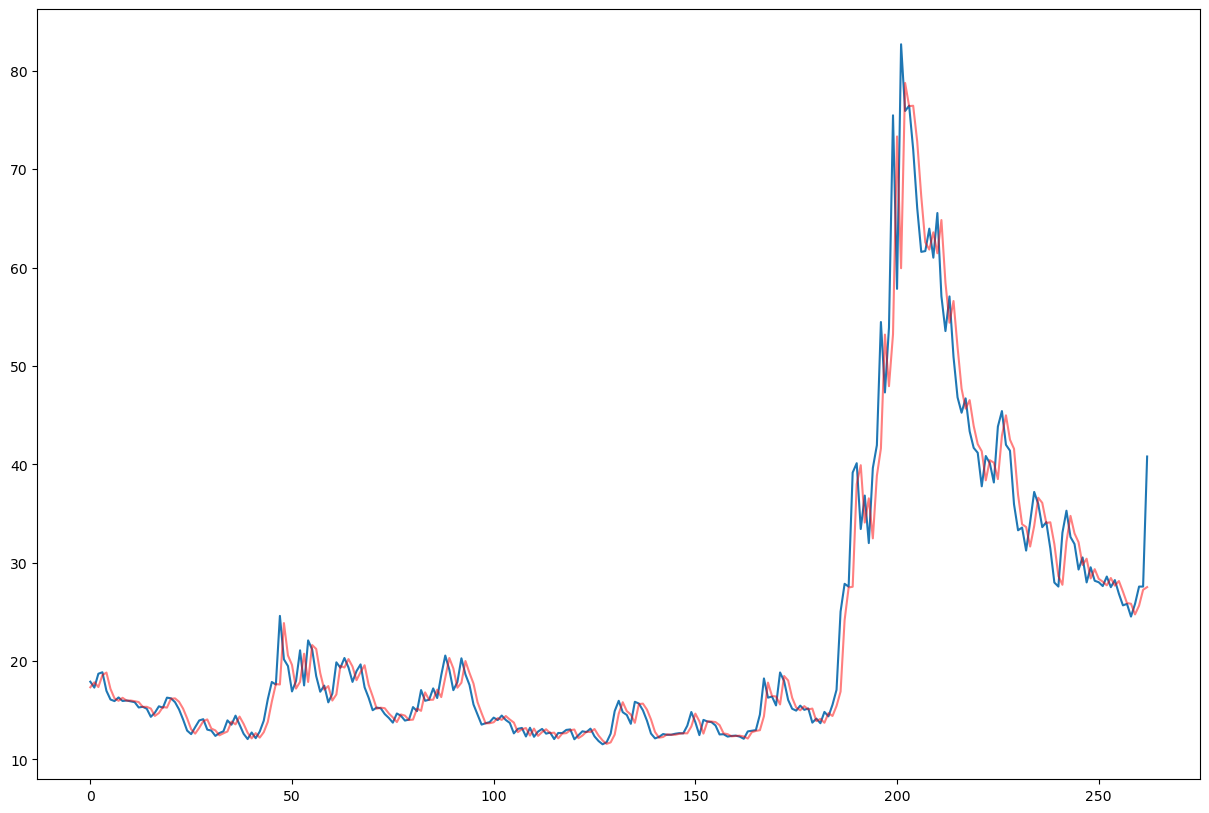

In [28]:
plt.figure(figsize=(15,10))
plt.plot(history[size:len(X)] )
plt.plot(predictions, color = 'red', alpha=.5)

## SARIMAX


Add in the negative count.

In [29]:
%%time
y = df['CLOSE'] # time series
X = df['Negative'] # exog features
tscv = TimeSeriesSplit(n_splits=5) # instatiate the split
## loop over the splits to get train and test indices
for train_index, test_index in tscv.split(y):
     y_train, y_test, X_train, X_test = y.iloc[train_index], y.iloc[test_index], X.iloc[train_index], X.iloc[test_index]
     # Fit a SARIMAX model with exog on the train set
     model = sm.tsa.SARIMAX(y_train, exog=X_train, order=(0, 1, 1))
     model_fit = model.fit()

     # Forecast the test set with exog
     y_pred = model_fit.forecast(len(y_test), exog=X_test)

     # Evaluate the forecast accuracy
     rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
     print('RMSE: %.3f' % rmse)

RMSE: 18.517
RMSE: 4.067
RMSE: 5.769
RMSE: 3.585
RMSE: 5.667
CPU times: total: 2.95 s
Wall time: 1.07 s


In [30]:
%%time
# walk-forward validation 

for t in range(len(test)):

    model = SARIMAX(history_close, exog=history_neg, order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test.CLOSE[t]
    history_close.append(obs)
    neg = test.Negative[t]

    history_neg.append(neg)

    print('predicted=%f, expected=%f' % (yhat, obs))



NameError: name 'history_close' is not defined

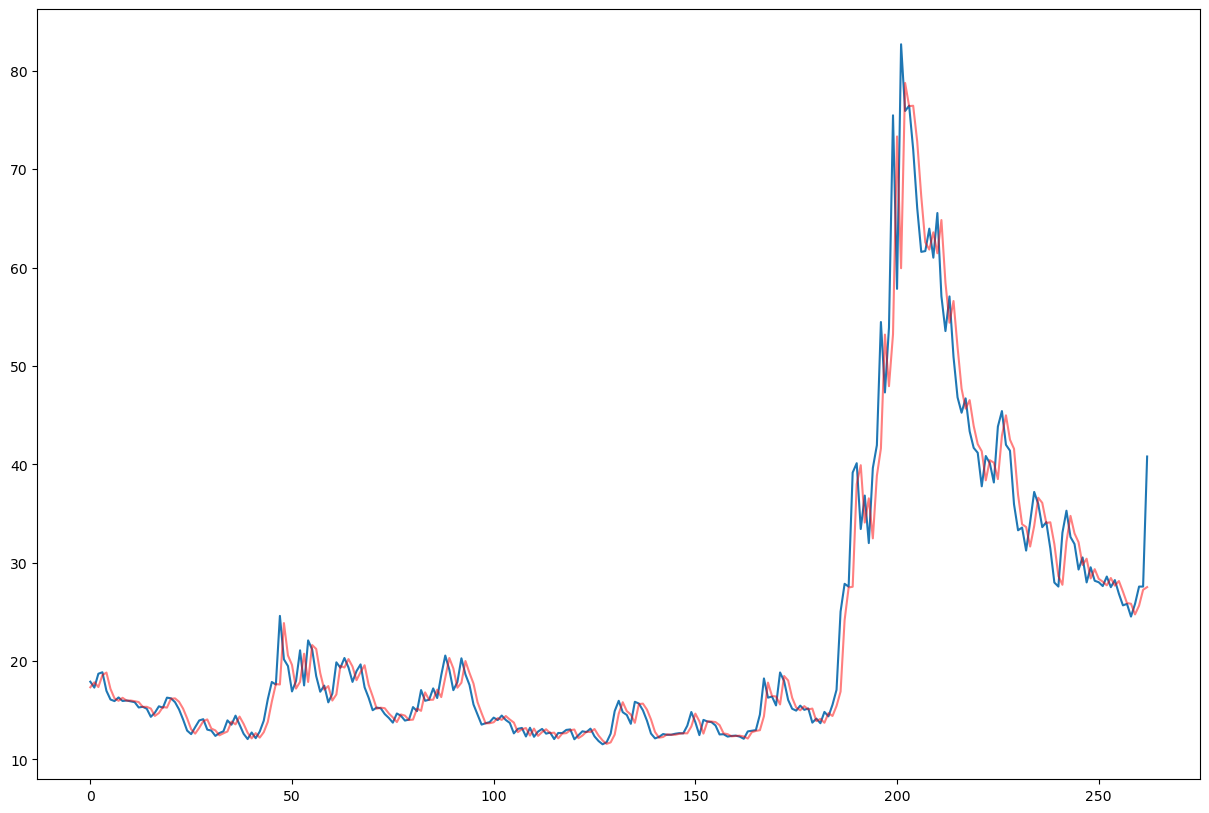

In [31]:
plt.figure(figsize=(15,10))
plt.plot(history[size:len(X)] )
plt.plot(predictions, color = 'red', alpha=.5)

In [32]:
X

133      17
134      15
135       8
136      29
137      26
       ... 
2756     85
2757     68
2758     88
2759    212
2760    105
Name: Negative, Length: 2628, dtype: int64

In [33]:
%%time
# split into train and test sets
X = df
tscv = TimeSeriesSplit(n_splits=3)
for train, test in tscv.split(X['date']):
    history_close = [X.loc[train, 'CLOSE'] for x in train]
    history_neg = [X.loc[train,'Negative'] for x  in train]
    predictions = list()
    print(history_close.shape)
# # walk-forward validation
# for t in range(len(test)):
    model = sm.tsa.statespace.SARIMAX(history_close, exog=history_neg, order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test.CLOSE[t]
    history_close.append(obs)
    neg = test.Negative[t]
    history_neg.append(neg)
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red', alpha=.3)
plt.show()
# # Fit the model
# mod = sm.tsa.statespace.SARIMAX(data['wpi'], trend='c', order=(1,1,1))
# res = mod.fit(disp=False)
# print(res.summary())

KeyError: '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132] not in index'